In [2]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
baseline_scores = {
    "winogrande": 0.6898,
    "boolq": 0.7648,
    "hellaswag": 0.7511,
    "swag": 0.7640,
    "xwinograd_en": 0.8804
}


# Initialize a DataFrame to store the results
results_df = pd.DataFrame()

# Loop through the directories
for i in range(32):
    dir_name = f"./logs/llama7b_2b-{i}"
    file_path = os.path.join(dir_name, "results.json")

    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)["results"]
            
            # Extracting scores
            scores = {}
            for dataset, metrics in data.items():
                scores[dataset] = metrics.get("acc_norm,none", metrics.get("acc,none"))

            # Adding scores to the DataFrame
            results_df[dir_name] = pd.Series(scores)

# Transposing the DataFrame for better plotting
results_df = results_df.T


In [25]:
results_df.index = np.arange(32)

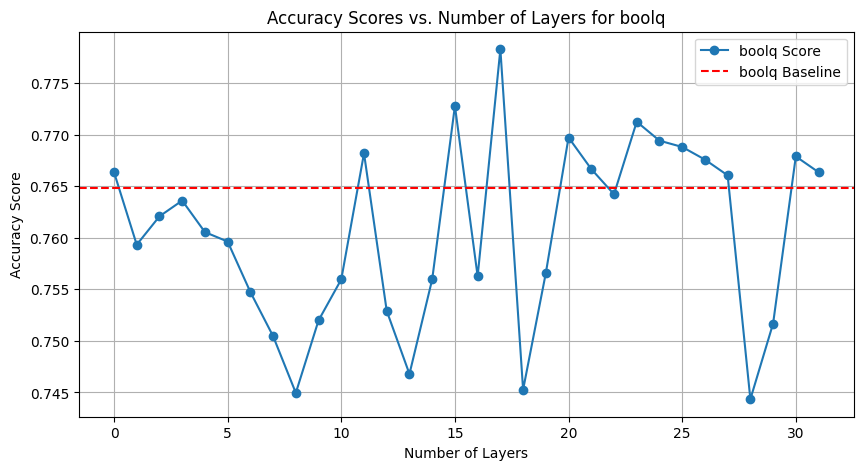

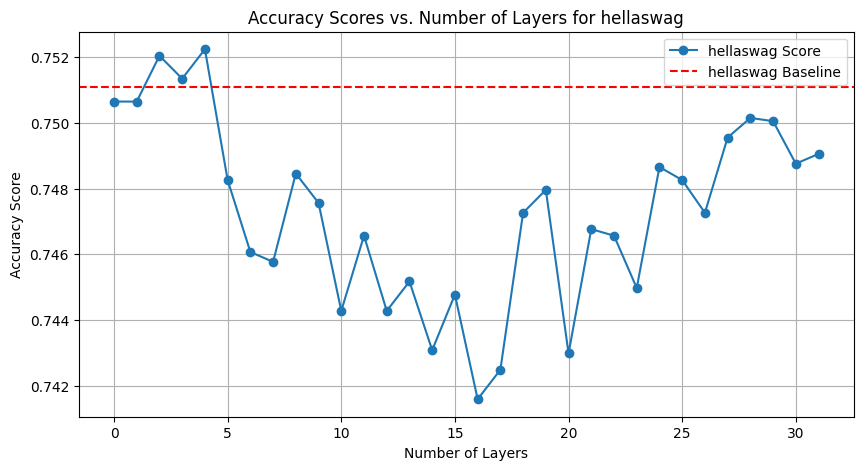

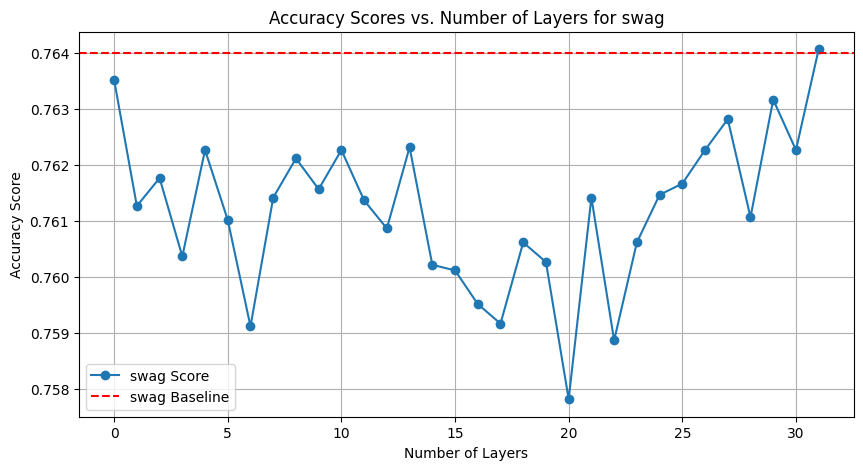

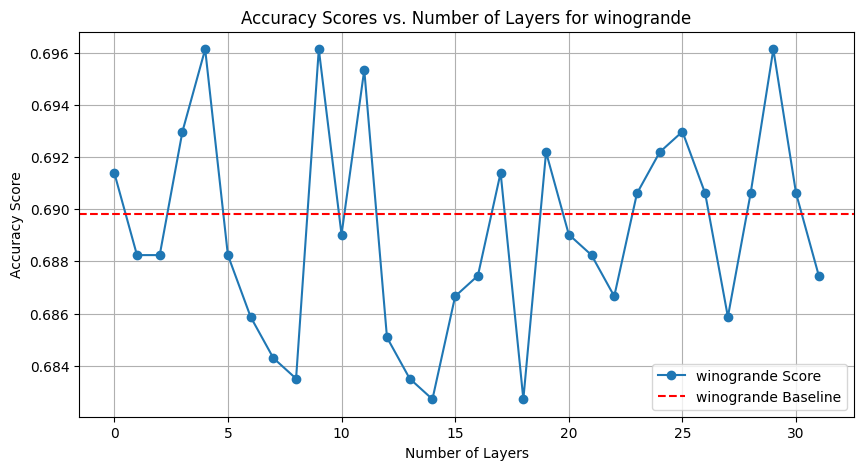

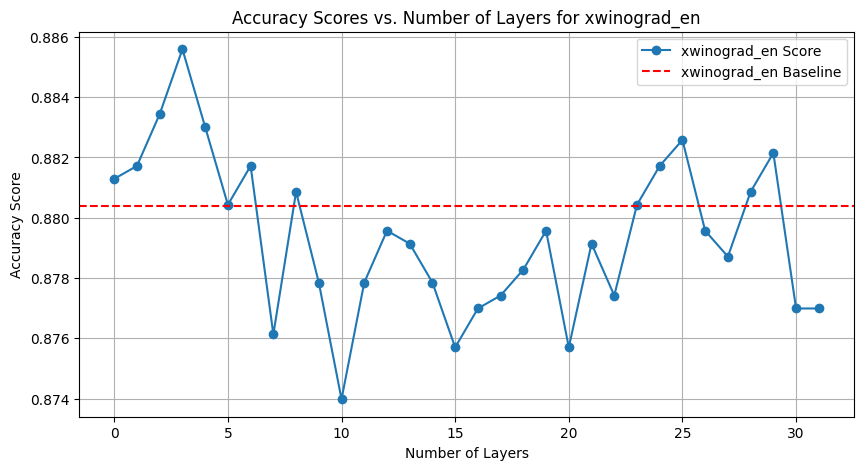

In [26]:
# Creating a separate plot for each dataset
for dataset in results_df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(results_df.index, results_df[dataset], label=f"{dataset} Score", marker='o')

    # Adding baseline score as a horizontal line
    if dataset in baseline_scores:
        plt.axhline(y=baseline_scores[dataset], color='r', linestyle='--', label=f"{dataset} Baseline")

    plt.title(f"Accuracy Scores vs. Number of Layers for {dataset}")
    plt.xlabel("Number of Layers")
    plt.ylabel("Accuracy Score")
    plt.legend()
    plt.grid(True)
    plt.show()

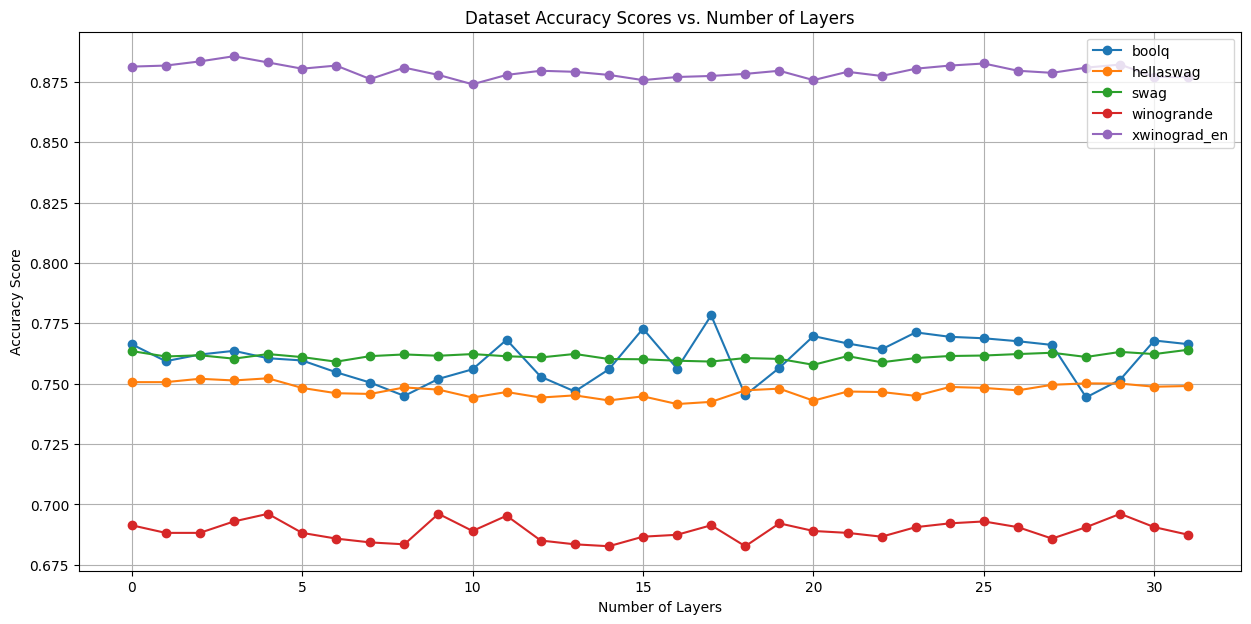

In [27]:
# Plotting the data
plt.figure(figsize=(15, 7))
for dataset in results_df.columns:
    plt.plot(results_df.index, results_df[dataset], label=dataset, marker='o')

plt.title("Dataset Accuracy Scores vs. Number of Layers")
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
results_df.mean(axis=1).sort_values(ascending=False)


25    0.770858
4     0.770841
3     0.770778
24    0.770691
0     0.770643
11    0.769865
17    0.769752
23    0.769577
2     0.769515
26    0.769459
30    0.769303
31    0.768785
29    0.768637
27    0.768602
21    0.768446
1     0.768241
15    0.768007
5     0.767516
19    0.767312
20    0.767051
9     0.767020
22    0.766748
6     0.765504
28    0.765406
10    0.765103
12    0.764541
16    0.764363
8     0.763979
14    0.763966
7     0.763614
13    0.763385
18    0.762828
dtype: float64

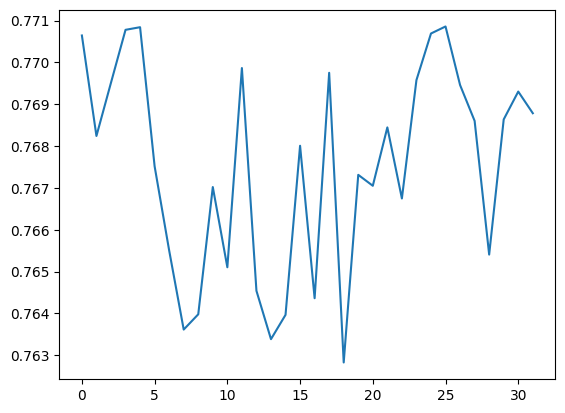

In [32]:
plt.plot(results_df.mean(axis=1))

In [4]:
baseline_scores = {
    "winogrande": 0.6898,
    "boolq": 0.7648,
    "hellaswag": 0.7511,
    "swag": 0.7640,
    "xwinograd_en": 0.8804
}


# Initialize a DataFrame to store the results
results_df = pd.DataFrame()


sa_projections = ['q_proj', 'k_proj', 'v_proj', 'o_proj']
mlp_projections = ['gate_proj', 'up_proj', 'down_proj']
projectors = sa_projections + mlp_projections

# Loop through the directories
for proj_name in projectors:
    dir_name = f"./logs/llama7b_2b-{proj_name}"
    file_path = os.path.join(dir_name, "results.json")

    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)["results"]
            
            # Extracting scores
            scores = {}
            for dataset, metrics in data.items():
                scores[dataset] = metrics.get("acc_norm,none", metrics.get("acc,none"))

            # Adding scores to the DataFrame
            results_df[dir_name] = pd.Series(scores)

# Transposing the DataFrame for better plotting
results_df = results_df.T
results_df.index = projectors

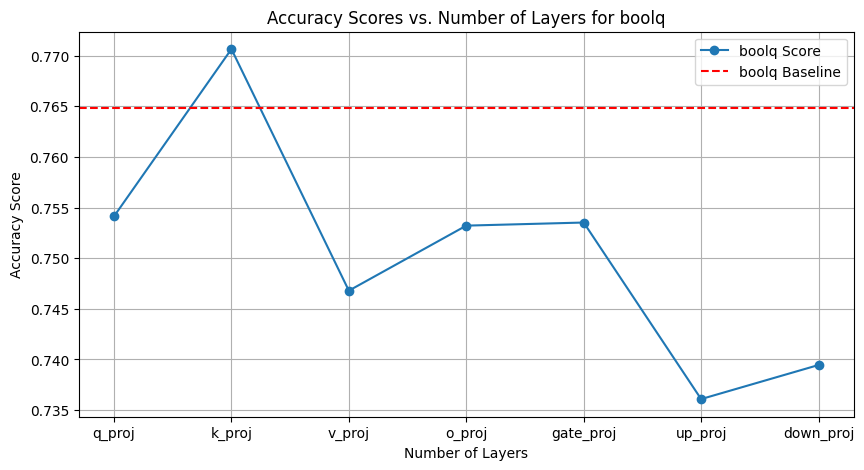

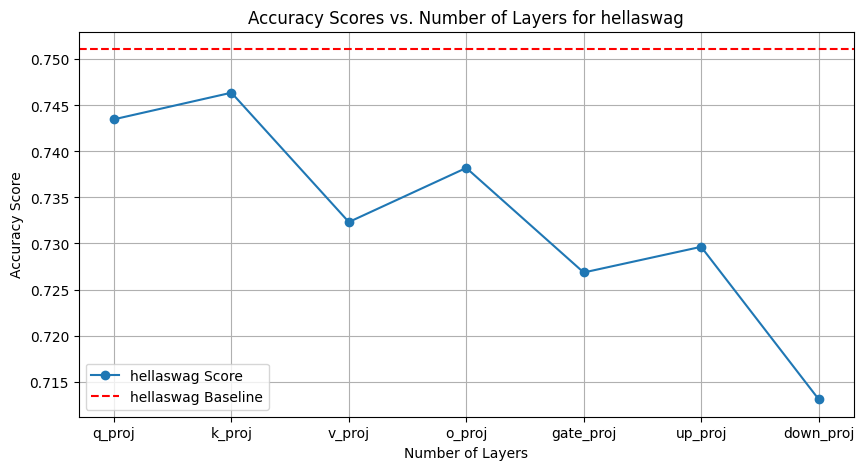

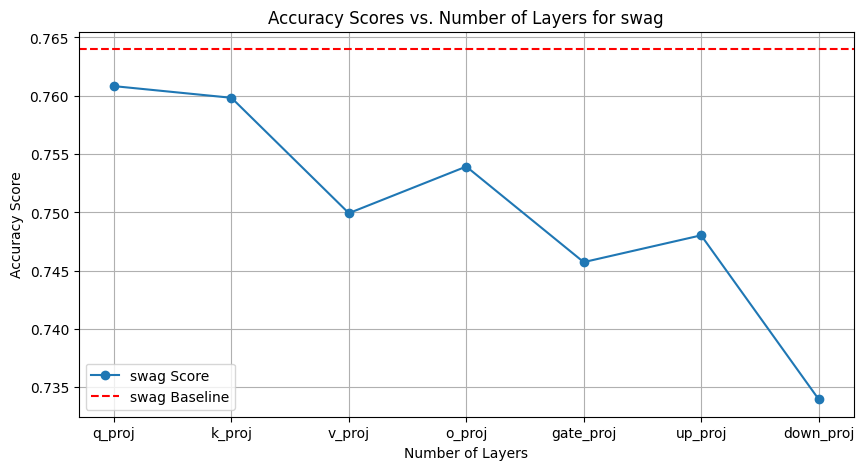

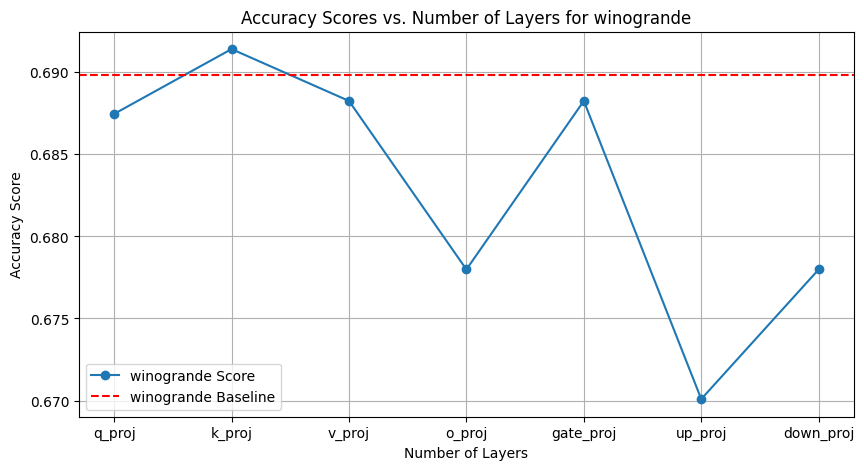

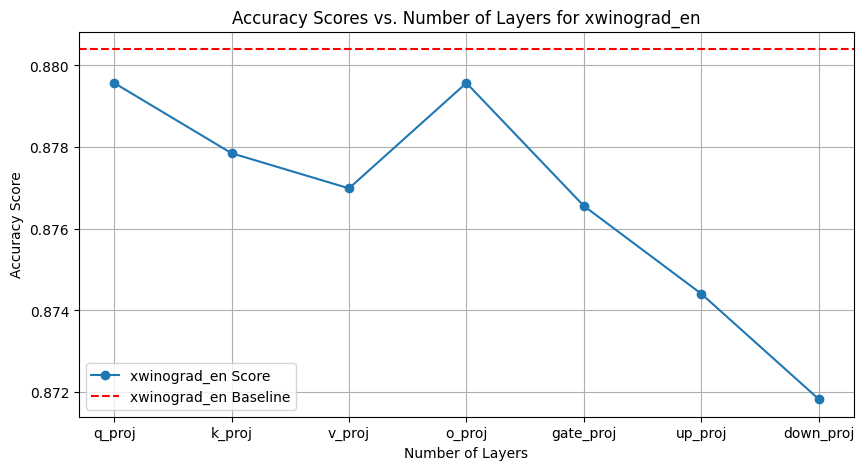

In [6]:
# Creating a separate plot for each dataset
for dataset in results_df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(results_df.index, results_df[dataset], label=f"{dataset} Score", marker='o')

    # Adding baseline score as a horizontal line
    if dataset in baseline_scores:
        plt.axhline(y=baseline_scores[dataset], color='r', linestyle='--', label=f"{dataset} Baseline")

    plt.title(f"Accuracy Scores vs. Number of Layers for {dataset}")
    plt.xlabel("Number of Layers")
    plt.ylabel("Accuracy Score")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'sensitivity_{dataset}.png')
    plt.show()

In [1]:
#path4 = '../data/compression/quik_cache/llama7b_4w_16a.pt'
path2 = '../data/compression/quik_cache/llama7b_2w_16a_128fp.pt'

In [2]:
import torch 

#model4 = torch.load(path4)
model2 = torch.load(path2)

/root/anaconda3/envs/quik/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
getattr( model2.model.layers[0].self_attn, 'q_proj')

Linear(in_features=4096, out_features=4096, bias=False)

In [20]:
model2.model.layers[0].mlp._modules

OrderedDict([('gate_proj',
              Linear(in_features=4096, out_features=11008, bias=False)),
             ('up_proj',
              Linear(in_features=4096, out_features=11008, bias=False)),
             ('down_proj',
              Linear(in_features=11008, out_features=4096, bias=False)),
             ('act_fn', SiLU())])

In [7]:
model2.model.layers[0].self_attn.q_proj.load_state_dict(model2.model.layers[0].self_attn.q_proj.state_dict())

<All keys matched successfully>

In [48]:
layer_num = 0

model4.model.layers[layer_num].load_state_dict(model2.model.layers[layer_num].state_dict())

<All keys matched successfully>

In [39]:
Path(path4).parent / 

PosixPath('../data/compression/quik_cache')

In [46]:
model_name = Path(path4).parts[-1]

In [58]:
new_model_name = f'{model_name.split(".")[0]}_2b-layer{layer_num}.pt'

In [60]:
new_model_path = Path(path4).parent / new_model_name

In [62]:
torch.save(model4, new_model_path)

In [54]:
model_name.split('.')

['llama7b_4w_16a', 'pt']

In [65]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer

model = GPTNeoXForCausalLM.from_pretrained(
  "EleutherAI/pythia-70m-deduped",
  revision="step3000",
)

tokenizer = AutoTokenizer.from_pretrained(
  "EleutherAI/pythia-70m-deduped",
  revision="step3000",
)

config.json: 100%|██████████| 567/567 [00:00<00:00, 1.33MB/s]
pytorch_model.bin: 100%|██████████| 166M/166M [00:02<00:00, 55.8MB/s] 
tokenizer_config.json: 100%|██████████| 396/396 [00:00<00:00, 855kB/s]
tokenizer.json: 100%|██████████| 2.11M/2.11M [00:00<00:00, 4.45MB/s]
special_tokens_map.json: 100%|██████████| 99.0/99.0 [00:00<00:00, 236kB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [67]:
torch.save(model, '/home/data/compression/quik_cache/full_pythia14M.pt')